   # Topic 1. Primary data analysis with Pandas
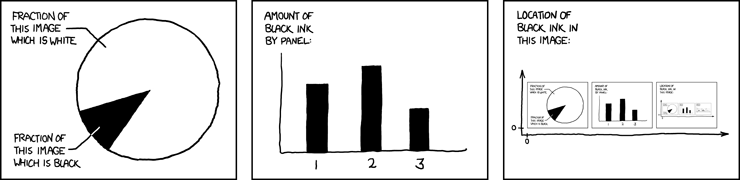

In this topic we'll complete a primary data analysis of a chemical dataset from a [Kaggle competition](https://www.kaggle.com/c/champs-scalar-coupling/data). The goal of the competition was to provide an algorithm to predict magnetic interaction between two atoms in a molecule (i.e., the scalar coupling constant).

## Primary datafile description

In [1]:
import json
with open('../../course_config.json') as json_file:
    CONFIG = json.load(json_file)

In [2]:
import numpy as np
import pandas as pd

Let's read our .csv datafile using pandas `read_csv()` method. To take a look at the first few lines we'll use `head()`. By default it shows 5 top rows.

In [3]:
df = pd.read_csv(CONFIG['dataset_path'] + '/champs-scalar-coupling/dipole_moments.csv')
df.head()

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511
3,dsgdb9nsd_000004,0.0000,0.0,0.0000
4,dsgdb9nsd_000005,0.0000,0.0,-2.8937


We can see, that the file we're reading consists of 4 columns -- molecule name and XYZ coordinates respectively of the dipole moment. In order to look at the data dimensionality and feature naming we'll use `shape` and `columns` attributes of a dataframe

In [4]:
df.shape, df.columns

((130789, 4), Index(['molecule_name', 'X', 'Y', 'Z'], dtype='object'))

The uploaded datafile contains only 130789 rows and 4 columns ('molecule_name', 'X', 'Y', 'Z'). 

As we see, columns with coordinates and potential energy are stored as floats. Columns with mixed types and strings are stored with the object dtype.
<br>There are several ways how we can set the number of decimal places. For simplicity we'll use `round(n)`, where `n` represent number of decimal points

In [5]:
df = df.round(3)
df.head(3)

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0,0.0,0.000
1,dsgdb9nsd_000002,-0.0,0.0,1.626
2,dsgdb9nsd_000003,0.0,0.0,-1.851


## Combining several datafiles

Let's upload another file to get more details about the molecules. Among others there is a ``potential_energy.csv`` datafile, that we can combine with our current dataframe using `merge()` method

In [6]:
potential_energy_df = pd.read_csv(CONFIG['dataset_path'] + '/champs-scalar-coupling/potential_energy.csv')
potential_energy_df.head(3)

,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.523680
1,dsgdb9nsd_000002,-56.560246
2,dsgdb9nsd_000003,-76.426077


In [7]:
df = pd.merge(df, potential_energy_df, how='outer', on=['molecule_name'])
df.head()

,molecule_name,X,Y,Z,potential_energy
0,dsgdb9nsd_000001,0.0,0.0,0.000,-40.523680
1,dsgdb9nsd_000002,-0.0,0.0,1.626,-56.560246
2,dsgdb9nsd_000003,0.0,0.0,-1.851,-76.426077
3,dsgdb9nsd_000004,0.0,0.0,0.000,-77.335268
4,dsgdb9nsd_000005,0.0,0.0,-2.894,-93.428488


We've merged <b>df</b> and <b>potential_energy_df</b> dataframe on <b>molecule_name</b> key. You can read more on grouping dataframes in the following pandas [tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).
<br>Now let's take a look at our updated feature types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130789 entries, 0 to 130788
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   molecule_name     130789 non-null  object 
 1   X                 130789 non-null  float64
 2   Y                 130789 non-null  float64
 3   Z                 130789 non-null  float64
 4   potential_energy  130789 non-null  float64
dtypes: float64(4), object(1)
memory usage: 6.0+ MB


We've added a potential_energy column and rounded all float columns, so that our dataframe would be more readable

## Conditional operations

In order to get a single column, we can use `df['some_column']` or `df.some_column` construction.
<br>For example we can calculate average potential energy in our dataframe using ```mean()``` method

In [9]:
df['potential_energy'].mean()

-410.9514131588788

Boolean indexing can be very useful for basic filtering. More example on filtering you'll get during this topic. For now, you may use the following basic syntax:
<br>```df[df['some_conditional_column'] (condition <!=>) some_value]['some_display_column']```
<br>For example let's calculate average potential energy, for molecules, which potential energy values is less than -400

In [10]:
df[df['potential_energy'] < -400]['potential_energy'].mean()

-433.100866146618

In the above example ```df['potential_energy'] < -400``` is a bool expresion: either potential energy value satisfies the condition or not. This expresion might be more complicated, including several conditions at once

In [11]:
print(
df[(df['X'] == 0)]['potential_energy'].min(),
df[(df['X'] == 0) & (df['Y'] == 0)]['potential_energy'].min(),
df[(df['X'] == 0) & (df['Y'] == 0) & (df['Z'] == 0)]['potential_energy'].min())

-714.6261972 -714.6261972 -529.9790320000001


It seems the stricter the rule (more coordinates should be centric) the lower number of molecules apply to that rule. What leads to narrowing the min-max boundries and increasing the minimum potential energy value. Last, but not least, let's look at median value of potential_energy for molecules with center at (0,0,0) and molecules with neither of the coordinates are centric

In [12]:
df[(df['X'] == 0) & (df['Y'] == 0) & (df['Z'] == 0)]['potential_energy'].median(), df[(df['X'] != 0) & (df['Y'] != 0) & (df['Z'] != 0)]['potential_energy'].median()

(-315.7387769, -418.0691439)

It seems the median values differ quite significantly between the classes. I encourage you to look for an explanation yourself :)

## Indexing dataframes 

DataFrames can be indexed by:
<ul>
   <li>column name (label)
   <li>row name (index)
   <li>serial number of a row.
</ul>

The ```loc()``` method is used for indexing by name, whereas ```iloc()``` is used for indexing by number.

In [13]:
df.loc[0:5, 'X':'Z']

,X,Y,Z
0,0.000,0.0,0.000
1,-0.000,0.0,1.626
2,0.000,0.0,-1.851
3,0.000,0.0,0.000
4,0.000,0.0,-2.894
5,-2.109,0.0,0.000


In [14]:
df.iloc[-1:, 0:2]

,molecule_name,X
130788,dsgdb9nsd_133885,-0.858


Using current index is not very comfortable. Much more useful would be to use molecule_name column. For that reason applying ```set_index()``` method

In [15]:
df.set_index('molecule_name', inplace = True)
df.head(3)

,X,Y,Z,potential_energy
molecule_name,,,,
dsgdb9nsd_000001,0.0,0.0,0.000,-40.523680
dsgdb9nsd_000002,-0.0,0.0,1.626,-56.560246
dsgdb9nsd_000003,0.0,0.0,-1.851,-76.426077


## Feature engineering

Till this moment we had 4 features we collected from the initial csv files. We can generate new features using different operations. For example, we can calculate the distance to center (0,0,0) using our XYZ coordinates.
<br>The formula with be as follows:
<br>${d} = \sqrt[3]{({X} - {X}_{0})^2 + ({Y} - {Y}_{0})^2 + ({Z} - {Z}_{0})^2}  = \sqrt[3]{{X}^2 + {Y}^2 + {Z}^2}$
<br>
<br>For complex math operation you might consider using pythons' [math](https://docs.python.org/3/library/math.html) operation. In this example we'll write the formula as is

In [16]:
df['d_to_center'] = (df['X']**2+df['Y']**2+df['Z']**2)**(1/3)

We can also create columns based on condition. Below is an example of calculating the amount of 0's amon XYZ coordinates. This data might give us hints about the symmetry of molecules

In [17]:
df['0\'s among XYZ'] = (df[['X','Y','Z']] == 0).astype(int).sum(axis=1)

In order to apply functions to each column, you may use `apply()` method. The function inside might be simple `np.mean()`, `np.max()`, `np.min()`, etc. For complex calculations one can use `lambda` functions. You may also create dataframe columns based on the results of `apply()` method

In [18]:
df.apply(np.max) 

X                   29.549000
Y                   13.006000
Z                    7.696000
potential_energy   -40.523680
d_to_center          9.559394
0's among XYZ        3.000000
dtype: float64

In [19]:
df['centric_dipole_moment'] = df['d_to_center'].apply(lambda x: True if x == 0 else False)
df['distance_more_than_1A'] = df['d_to_center'].apply(lambda x: True if x >= 1 else False)

Our dataframe so far:

In [20]:
df.head(3)

,X,Y,Z,potential_energy,d_to_center,0's among XYZ,centric_dipole_moment,distance_more_than_1A
molecule_name,,,,,,,,
dsgdb9nsd_000001,0.0,0.0,0.000,-40.523680,0.000000,3,True,False
dsgdb9nsd_000002,-0.0,0.0,1.626,-56.560246,1.382761,2,False,True
dsgdb9nsd_000003,0.0,0.0,-1.851,-76.426077,1.507547,2,False,True


## Dropping and inserting columns

Besides adding column it makes sense to delete them and keep the dataframe tidy. In order to do that, one can use ```drop()``` method, passing the required indexes. Using ```inplace=True``` parameter you will apply the changes to your current dataframe. The axis parameter will show either you want to delete columns (```axis=1```) or rows (`axis=0` by default)

In [21]:
df.columns

Index(['X', 'Y', 'Z', 'potential_energy', 'd_to_center', '0's among XYZ',
       'centric_dipole_moment', 'distance_more_than_1A'],
      dtype='object')

In [22]:
df.drop(['d_to_center'], axis=1, inplace=True)
df.columns

Index(['X', 'Y', 'Z', 'potential_energy', '0's among XYZ',
       'centric_dipole_moment', 'distance_more_than_1A'],
      dtype='object')

In [23]:
df.drop(['dsgdb9nsd_000001', 'dsgdb9nsd_000003']).head()

,X,Y,Z,potential_energy,0's among XYZ,centric_dipole_moment,distance_more_than_1A
molecule_name,,,,,,,
dsgdb9nsd_000002,-0.000,0.0,1.626,-56.560246,2,False,True
dsgdb9nsd_000004,0.000,0.0,0.000,-77.335268,3,True,False
dsgdb9nsd_000005,0.000,0.0,-2.894,-93.428488,2,False,True
dsgdb9nsd_000006,-2.109,0.0,0.000,-114.510216,2,False,True
dsgdb9nsd_000007,0.000,0.0,0.000,-79.838694,3,True,False


Inserting columns you might perform as it was shown above. Another way is to insert some values into your dataframe. For example, the <b>distance_to_center</b> values might've been obtained from a function or assignment. The `loc=<int>` parameter assigns the position of the column, `column=<name>` assigns future name and `value=<some_value>` assign the values of the column.
Let's restore our `d_to_center` column, deleted previously and locate it right after XYZ columns

In [24]:
distance_to_center = (df['X']**2+df['Y']**2+df['Z']**2)**(1/3)
df.insert(loc=3, column='d_to_center', value=distance_to_center)
df.tail(4)

,X,Y,Z,d_to_center,potential_energy,0's among XYZ,centric_dipole_moment,distance_more_than_1A
molecule_name,,,,,,,,
dsgdb9nsd_133882,-0.371,-1.244,0.0,1.190004,-400.757209,1,False,True
dsgdb9nsd_133883,-0.436,1.169,-0.0,1.158949,-380.894376,1,False,True
dsgdb9nsd_133884,1.362,1.406,-0.0,1.564843,-364.872596,1,False,True
dsgdb9nsd_133885,-0.858,-0.091,-0.0,0.906312,-400.760914,1,False,False


#### Adding chemical formulas

Let's add chemical formulas to our existing dataset. In order to do that, we'll:
<ul>
    <li>read all the files we have in the data/structures folder
    <li>process each file via molmod library
    <li>save all formula into list
    <li>construct a dataframe upon formula list
</ul>
Afterwards, we'll merge our generated dataframe into our current one.

In [25]:
import os
from molmod import Molecule
xyzFiles = os.listdir(CONFIG['dataset_path'] + '/champs-scalar-coupling/structures/')
molecule_names = [name[:-4] for name in xyzFiles]
molecule_formula_names = []

for name in xyzFiles:
    mol = Molecule.from_file(CONFIG['dataset_path'] + '/champs-scalar-coupling/structures/'+name)
    molecule_formula_names.append(mol.chemical_formula)
    
molnames_df = pd.DataFrame({'molecule_name' : molecule_names, 'molecule_formula' : molecule_formula_names})  
df = pd.merge(molnames_df, df, how='outer', on=['molecule_name'])
df.head()

,molecule_name,molecule_formula,X,Y,Z,d_to_center,potential_energy,0's among XYZ,centric_dipole_moment,distance_more_than_1A
0,dsgdb9nsd_086753,ONC7H9,4.898,0.301,-0.185,2.889108,-402.126372,0,False,True
1,dsgdb9nsd_053724,O2N2C5H2,-3.581,0.563,3.536,2.948906,-451.613879,0,False,True
2,dsgdb9nsd_115995,ON2C6H10,-0.881,-2.694,-0.180,2.005501,-419.388262,0,False,True
3,dsgdb9nsd_018373,O3C5H8,0.672,1.426,0.935,1.497668,-420.978410,0,False,True
4,dsgdb9nsd_057826,ON2C6H6,-4.660,3.133,0.000,3.159225,-416.926440,1,False,True


<i>Q: why can't we add formula list to our dataframe directly?

## Dataset description

The `describe()` method shows basic statistical characteristics of each numerical feature: number of non-missing values, mean, standard deviation, range, 0.25, 0.5 and 0.75 quartiles. Notice, that describes works for numeric data only

In [26]:
df.describe()

,X,Y,Z,d_to_center,potential_energy,0's among XYZ
count,130789.000000,130789.000000,130789.000000,130789.000000,130789.000000,130789.000000
mean,-0.009220,0.091772,0.252390,1.857309,-410.951413,0.110124
std,2.293274,1.737839,1.027703,0.714951,39.839916,0.338939
min,-22.958000,-9.252000,-6.028000,0.000000,-714.626197,0.000000
25%,-1.347000,-0.942000,-0.248000,1.355534,-438.002671,0.000000
50%,0.000000,0.081000,0.118000,1.830097,-416.920943,0.000000
75%,1.319000,1.161000,0.903000,2.347527,-387.221827,0.000000
max,29.549000,13.006000,7.696000,9.559394,-40.523680,3.000000


`describe()` method allows us to gather some insights about the data. We can see that the range of `X` values is much larger compared to `Y` and `Z`. The mean value of `0's among XYZ` column allows to suggest that the majority of XYZ values aren't equal to 0, despite close to zero mean and median values.<br>Notice the closeness between mean and median (50%) values for `d_to_center` and `potential_energy` columns. This is not always, but usually a good sign for normal distributions, as well as similar shoulders for 25% and 75% quartiles.

Basic histograms can be displayed using dataframe `hist()` method. Though we'll deal more with visualization in the following topics, let's take a peak on some of our distributions

array([[<AxesSubplot:title={'center':'d_to_center'}>,
        <AxesSubplot:title={'center':'potential_energy'}>],
       [<AxesSubplot:title={'center':"0's among XYZ"}>, <AxesSubplot:>]],
      dtype=object)

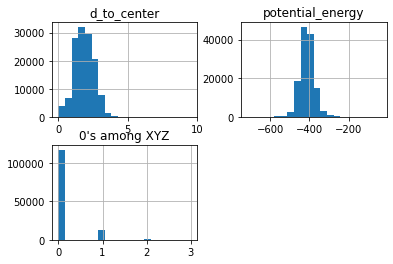

In [27]:
df.hist(column=['d_to_center','potential_energy','0\'s among XYZ'], bins=20)

As we've predicted earlier, `d_to_center` and `potential_energy` distributions seems to remind gaussians'.

For categorical (type object) and boolean (type bool) features we can use the ```value_counts()``` method to observe the distribution of a feature. With ```normalize=True``` parameter we can see fractions rather than frequencies

In [28]:
df['distance_more_than_1A'].value_counts()

True     118570
False     12219
Name: distance_more_than_1A, dtype: int64

In [29]:
df['distance_more_than_1A'].value_counts(normalize=True)

True     0.906575
False    0.093425
Name: distance_more_than_1A, dtype: float64

In [30]:
df['0\'s among XYZ'].value_counts(normalize=True)

0    0.897637
1    0.095283
2    0.006400
3    0.000680
Name: 0's among XYZ, dtype: float64

# Sorting

Dataframes can be sorted by one or multiple columns in ascending or descending order.

In [31]:
df.sort_values(by='potential_energy', ascending=False).head()

,molecule_name,molecule_formula,X,Y,Z,d_to_center,potential_energy,0's among XYZ,centric_dipole_moment,distance_more_than_1A
10271,dsgdb9nsd_000001,CH4,0.0,0.0,0.000,0.000000,-40.523680,3,True,False
77327,dsgdb9nsd_000002,NH3,-0.0,0.0,1.626,1.382761,-56.560246,2,False,True
3824,dsgdb9nsd_000003,OH2,0.0,0.0,-1.851,1.507547,-76.426077,2,False,True
57673,dsgdb9nsd_000004,C2H2,0.0,0.0,0.000,0.000000,-77.335268,3,True,False
77792,dsgdb9nsd_000007,C2H6,0.0,0.0,0.000,0.000000,-79.838694,3,True,False


In [32]:
df.sort_values(by=['molecule_formula', 'd_to_center']).head()

,molecule_name,molecule_formula,X,Y,Z,d_to_center,potential_energy,0's among XYZ,centric_dipole_moment,distance_more_than_1A
57673,dsgdb9nsd_000004,C2H2,0.000,0.00,0.0,0.000000,-77.335268,3,True,False
77792,dsgdb9nsd_000007,C2H6,0.000,0.00,0.0,0.000000,-79.838694,3,True,False
105107,dsgdb9nsd_000009,C3H4,0.716,0.00,-0.0,0.800342,-116.664959,2,False,False
25761,dsgdb9nsd_000016,C3H6,0.000,0.00,0.0,0.000000,-117.906029,3,True,False
33779,dsgdb9nsd_000013,C3H8,0.000,0.06,0.0,0.153262,-119.155657,2,False,False


After merging our dataframe index became broken. We'll fix that by setting the index once again and sorting by the molecule index afterwards

In [33]:
df.set_index('molecule_name', inplace = True)
df.sort_index(inplace = True)
df.head()

,molecule_formula,X,Y,Z,d_to_center,potential_energy,0's among XYZ,centric_dipole_moment,distance_more_than_1A
molecule_name,,,,,,,,,
dsgdb9nsd_000001,CH4,0.0,0.0,0.000,0.000000,-40.523680,3,True,False
dsgdb9nsd_000002,NH3,-0.0,0.0,1.626,1.382761,-56.560246,2,False,True
dsgdb9nsd_000003,OH2,0.0,0.0,-1.851,1.507547,-76.426077,2,False,True
dsgdb9nsd_000004,C2H2,0.0,0.0,0.000,0.000000,-77.335268,3,True,False
dsgdb9nsd_000005,NCH,0.0,0.0,-2.894,2.030793,-93.428488,2,False,True


## Filtering

We've touched already filtering briefly in conditional operations part. Basicaly, what we've done was filtered sub-dataframe and provided an operation on it. Let's take a look at flat centered (Z == 0), but unsymmetrical molecules (either X != 0 or Y != 0):

In [34]:
df[((df['X'] != 0) | (df['Y'] != 0)) & (df['Z']==0)]

,molecule_formula,X,Y,Z,d_to_center,potential_energy,0's among XYZ,centric_dipole_moment,distance_more_than_1A
molecule_name,,,,,,,,,
dsgdb9nsd_000006,OCH2,-2.109,0.000,0.0,1.644565,-114.510216,2,False,True
dsgdb9nsd_000008,OCH4,0.651,-1.380,-0.0,1.325379,-115.730344,1,False,True
dsgdb9nsd_000009,C3H4,0.716,0.000,-0.0,0.800342,-116.664959,2,False,False
dsgdb9nsd_000010,NC2H3,3.827,0.000,-0.0,2.446653,-132.763436,2,False,True
dsgdb9nsd_000011,OC2H4,2.360,1.012,0.0,1.875185,-153.842968,1,False,True
...,...,...,...,...,...,...,...,...,...
dsgdb9nsd_133880,OC8H8,0.131,-1.371,-0.0,1.237867,-384.749315,1,False,True
dsgdb9nsd_133882,ONC7H7,-0.371,-1.244,0.0,1.190004,-400.757209,1,False,True
dsgdb9nsd_133883,N2C7H8,-0.436,1.169,-0.0,1.158949,-380.894376,1,False,True


Most of the molecules in the dataset might have isomers. Let's filter out those who doesn't:

In [35]:
df[df['molecule_formula'].duplicated() == False] 

,molecule_formula,X,Y,Z,d_to_center,potential_energy,0's among XYZ,centric_dipole_moment,distance_more_than_1A
molecule_name,,,,,,,,,
dsgdb9nsd_000001,CH4,0.000,0.000,0.000,0.000000,-40.523680,3,True,False
dsgdb9nsd_000002,NH3,-0.000,0.000,1.626,1.382761,-56.560246,2,False,True
dsgdb9nsd_000003,OH2,0.000,0.000,-1.851,1.507547,-76.426077,2,False,True
dsgdb9nsd_000004,C2H2,0.000,0.000,0.000,0.000000,-77.335268,3,True,False
dsgdb9nsd_000005,NCH,0.000,0.000,-2.894,2.030793,-93.428488,2,False,True
...,...,...,...,...,...,...,...,...,...
dsgdb9nsd_133622,F3OC5H9,1.503,-1.151,-1.646,1.846243,-570.748672,0,False,True
dsgdb9nsd_133652,F3N2C4H7,-1.276,-1.632,-0.002,1.625074,-565.689270,0,False,True
dsgdb9nsd_133655,F3NC5H10,-0.737,0.439,0.173,0.914904,-550.879699,0,False,False


From out of about 130K molecules in our dataset, only 586 don't have isomers. What else were we expecting from organic chemistry?

In feature engineering part we've created some columns also based on filtering column values. Let's create a hydrocarbons boolean column based on regexing molecule_formula `^C\d*H\d*$`

In [36]:
import re
df['is_hydrocarbon'] = df['molecule_formula'].apply(lambda x: True if re.search(r'^C\d*H\d*$', x) else False)
df.head(3)

,molecule_formula,X,Y,Z,d_to_center,potential_energy,0's among XYZ,centric_dipole_moment,distance_more_than_1A,is_hydrocarbon
molecule_name,,,,,,,,,,
dsgdb9nsd_000001,CH4,0.0,0.0,0.000,0.000000,-40.523680,3,True,False,True
dsgdb9nsd_000002,NH3,-0.0,0.0,1.626,1.382761,-56.560246,2,False,True,False
dsgdb9nsd_000003,OH2,0.0,0.0,-1.851,1.507547,-76.426077,2,False,True,False


In [37]:
df['is_hydrocarbon'].value_counts(normalize=True)

False    0.962612
True     0.037388
Name: is_hydrocarbon, dtype: float64

Hydrocarbons are only 3.7% of the molecules in our dataframe. Let's quickly compare mean values for hydrocarbon and non-hydrocarbon classes

In [38]:
pd.DataFrame([df[df['is_hydrocarbon']].mean(), df[df['is_hydrocarbon'] == False].mean()])

,X,Y,Z,d_to_center,potential_energy,0's among XYZ,centric_dipole_moment,distance_more_than_1A,is_hydrocarbon
0,-0.004274,-0.015663,0.000103,0.459750,-338.797715,0.304703,0.009611,0.035992,1.0
1,-0.009412,0.095945,0.262189,1.911591,-413.753910,0.102566,0.000334,0.940389,0.0


As you may see, hydrocarbon and non-hydrocarbon properties differ significantly

## Grouping 

Generally speaking, grouping data in Pandas works as follows:

`df.groupby(by=grouping_columns)[columns_to_show].function()`

First, the groupby method aggreagtes the `grouping_columns` by their values. They become a new index in the resulting dataframe.
<br>Second, columns of interest are selected (`columns_to_show`). If `columns_to_show` is not included, all non-groupby clauses will be included.
<br>Finally, one or several `functions()` are applied to the obtained groups per selected columns

Let's group by `0\'s among XYZ` column. Our column of interest will be `potential_energy`. We'll use `describe()` and `agg()` methods to display grouped dataframe

In [39]:
df.groupby(['0\'s among XYZ'])['potential_energy'].describe(percentiles=[0.25,0.95])

,count,mean,std,min,25%,50%,95%,max
0's among XYZ,,,,,,,,
0,117401.0,-411.914279,37.728132,-621.518935,-438.006785,-418.069144,-349.156269,-169.906067
1,12462.0,-405.027457,51.577235,-605.451536,-437.957794,-403.336145,-313.279659,-115.730344
2,837.0,-373.644027,70.458876,-714.626197,-422.026016,-382.568902,-262.102318,-56.560246
3,89.0,-321.167731,92.494747,-529.979032,-383.861809,-315.738777,-154.495456,-40.523680


In [40]:
df.groupby(['0\'s among XYZ'])['potential_energy'].agg([np.mean, np.std, np.min, 
                                            np.max])

,mean,std,amin,amax
0's among XYZ,,,,
0,-411.914279,37.728132,-621.518935,-169.906067
1,-405.027457,51.577235,-605.451536,-115.730344
2,-373.644027,70.458876,-714.626197,-56.560246
3,-321.167731,92.494747,-529.979032,-40.523680


It seems that the higher the relative flatness of molecules under study, the lower the mean and median of potential energy.

You may use more than one column for grouping and use several columns of interest. Let's describe coordinates columns grouped by `centric_dipole_moment` and `distance_more_than_1A` columns:

In [41]:
df.groupby(['centric_dipole_moment', 'distance_more_than_1A'])[['X','Y','Z']].describe()

X                      \
                                                count      mean       std   
centric_dipole_moment distance_more_than_1A                                 
False                 False                   12130.0 -0.001103  0.399104   
                      True                   118570.0 -0.010058  2.405156   
True                  False                      89.0  0.000000  0.000000   

                                                                        \
                                                min    25%  50%    75%   
centric_dipole_moment distance_more_than_1A                              
False                 False                  -0.997 -0.213  0.0  0.210   
                      True                  -22.958 -1.541  0.0  1.508   
True                  False                   0.000  0.000  0.0  0.000   

                                                            Y            ...  \
                                                max     count      mean  ...   
centric_dipole_moment distance_more_than_1A                              ...   
False                 False                   0.999   12130.0  0.010154  ...   
                      True                   29.549  118570.0  0.100191  ...   
True                  False                   0.000      89.0  0.000000  ...   

                                                                   Z  \
                                               75%     max     count   
centric_dipole_moment distance_more_than_1A                            
False                 False                  0.214   0.992   12130.0   
                      True                   1.280  13.006  118570.0   
True                  False                  0.000   0.000      89.0   

                                                                        \
                                                 mean       std    min   
centric_dipole_moment distance_more_than_1A                              
False                 False                  0.038269  0.325390 -0.997   
                      True                   0.274485  1.071895 -6.028   
True                  False                  0.000000  0.000000  0.000   

                                                                           
                                                 25%    50%    75%    max  
centric_dipole_moment distance_more_than_1A                                
False                 False                 -0.09275  0.000  0.152  0.996  
                      True                  -0.30500  0.194  0.970  7.696  
True                  False                  0.00000  0.000  0.000  0.000  

[3 rows x 24 columns]

Previously, we've filtered out molecules without isomers. Using `groupby` we can count the number of isomers for each `molecule_formula`:

In [42]:
df.groupby(df['molecule_formula'].tolist(),as_index=False).size().sort_values(by = ['size'])

,index,size
0,C2H2,1
252,NC2H3,1
249,N6CH2,1
221,N4C4H10,1
209,N3C6H,1
...,...,...
480,OC8H12,4918
584,ONC7H9,5215
375,O2NC6H9,5630
578,ONC7H11,5858


Yowza! It looks like O2C7H10 formula have more than 6K+ isomers in our dataset, considering all molecules in the dataset are unique

## Summary tables 

The are several methods to build summary tables. One of them is using `pivot_table()` method. The method takes the following parameters:
<ul>
<li>values – a list of variables to calculate statistics for;
<li>index – a list of variables to group data by;
<li>aggfunc – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else;
</ul>

In our example we'll use `XYZ` columns as values, `0\'s among XYZ` column as index. We'll aggregate our table by median values:

In [43]:
df.pivot_table(['X','Y','Z'],
               ['0\'s among XYZ'], aggfunc='median')

,X,Y,Z
0's among XYZ,,,
0,-0.003,0.108,0.246
1,-0.000,0.000,0.000
2,0.000,-0.000,0.000
3,-0.000,0.000,0.000


This is quite interesting. For `0's among XYZ` values 1 and 2, all median values for all coordinates equal to zero. Let's compare that to the same pivot_table with mean as aggfunc

In [44]:
df.pivot_table(['X','Y','Z'],
               ['0\'s among XYZ'], aggfunc='mean')

,X,Y,Z
0's among XYZ,,,
0,-0.009154,0.082544,0.276261
1,-0.003210,0.192893,0.045785
2,-0.109000,-0.109661,0.007171
3,0.000000,0.000000,0.000000


You may see how different mean and median values are for our dataset

Another way to build contingency summary tables is using `crosstab()` method. We can show the size of classes we investigate. This kind of table is most suitable for categorial and boolean features

In [45]:
pd.crosstab(df['is_hydrocarbon'], df['0\'s among XYZ'])

0's among XYZ,0,1,2,3
is_hydrocarbon,,,,
False,113690,11547,620,42
True,3711,915,217,47
